In [1]:
import keras
from keras.datasets import cifar10

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

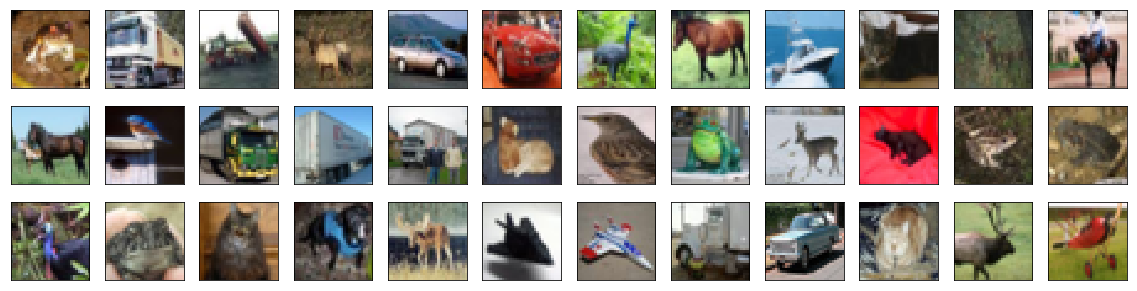

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]))

In [10]:
x_train = x_train.astype('float32')/255
x_test = y_test.astype('float32')/255

In [11]:
from keras.utils import np_utils

# one-hot encoding the labels
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# breaking the training set into training asd validation set
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# print shape of training set
print('x_train shape:', x_train.shape)

# print number of training, validation, and test images
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')

x_train shape: (45000, 32, 32, 3)
45000 train samples
10000 test samples
5000 validation samples


In [12]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 16)        208       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          8256      
_________________________________________________________________
max_pooling2d_3 (MaxP

In [13]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [14]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, save_best_only=True)
hist = model.fit(x_train, y_train, batch_size=32, epochs=100, validation_data=(x_valid, y_valid), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 45000 samples, validate on 5000 samples
Epoch 1/100
 - 144s - loss: 1.6074 - acc: 0.4164 - val_loss: 1.3895 - val_acc: 0.4942

Epoch 00001: val_loss improved from inf to 1.38954, saving model to model.weights.best.hdf5
Epoch 2/100
 - 150s - loss: 1.3032 - acc: 0.5352 - val_loss: 1.1322 - val_acc: 0.5954

Epoch 00002: val_loss improved from 1.38954 to 1.13216, saving model to model.weights.best.hdf5
Epoch 3/100
 - 195s - loss: 1.1789 - acc: 0.5822 - val_loss: 1.1851 - val_acc: 0.5814

Epoch 00003: val_loss did not improve from 1.13216
Epoch 4/100
 - 188s - loss: 1.1089 - acc: 0.6101 - val_loss: 1.1256 - val_acc: 0.6184

Epoch 00004: val_loss improved from 1.13216 to 1.12562, saving model to model.weights.best.hdf5
Epoch 5/100
 - 173s - loss: 1.0505 - acc: 0.6336 - val_loss: 1.1404 - val_acc: 0.6200

Epoch 00005: val_loss did not improve from 1.12562
Epoch 6/100
 - 158s - loss: 1.0226 - acc: 0.6448 - val_loss: 1.0133 - val_acc: 0.6

In [15]:
# evaluate and print test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])

ValueError: Error when checking input: expected conv2d_1_input to have 4 dimensions, but got array with shape (10000, 1)